1. В выполненной работе добавьте замер времени обучения каждой модели.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

In [36]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/gen_regression.csv")

In [3]:
data.head()

,Unnamed: 0,x,y
0,0,96.597780,97761.592016
1,1,48.002892,27613.989207
2,2,47.939756,29410.187753
3,3,47.809026,15789.597531
4,4,69.784427,20953.383453


In [37]:
X = data.x
y = data.y

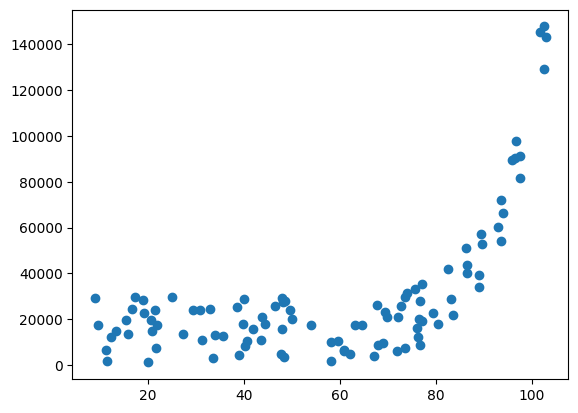

In [5]:
plt.scatter(X, y)

In [38]:
X = pd.DataFrame(X)

In [24]:
from sklearn.linear_model import LinearRegression
times = time.time()
linear = LinearRegression().fit(X, y)

Время:  1.1426970958709717


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


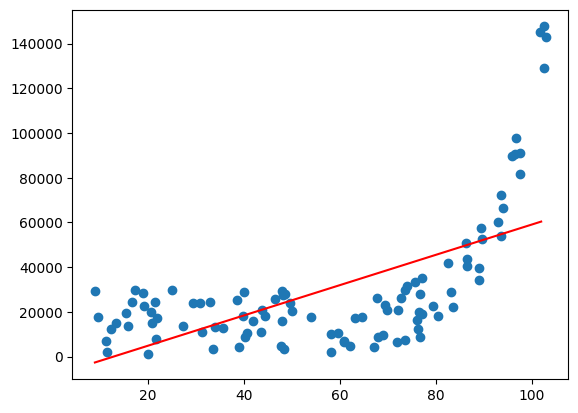

In [43]:
xx = np.arange(X.x.min(axis=0), X.x.max(axis=0))
yy = linear.predict(pd.DataFrame(xx))
print("Время: ", time.time() - times)
plt.scatter(X.x, y)
plt.plot(xx, yy, c='r')

In [44]:
linear.score(X, y)

0.37467360318911636

Время:  0.013352632522583008


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


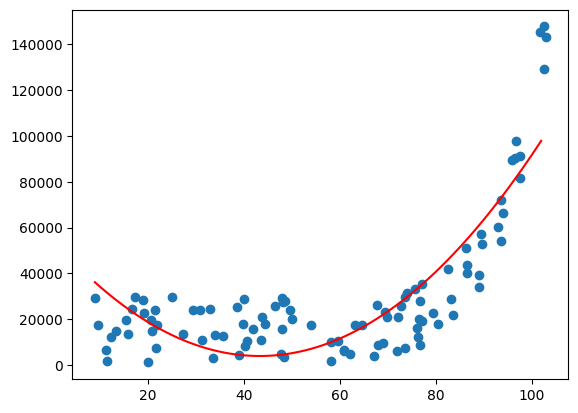

In [46]:
from sklearn.preprocessing import PolynomialFeatures
times = time.time()
transformation = PolynomialFeatures(degree=2)
transformation.fit(X)
X_2 = transformation.transform(X)
poly_2d = LinearRegression().fit(X_2, y)
xx_2d = transformation.transform(pd.DataFrame(xx))
yy_2d = poly_2d.predict(xx_2d)
print("Время: ", time.time() - times)
plt.scatter(X.x, y)
plt.plot(xx, yy_2d, c='r')

In [47]:
poly_2d.score(X_2, y)

0.7359753787024842

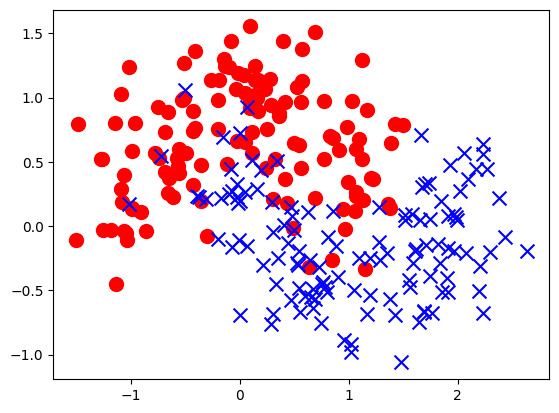

In [48]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/gen_classification.csv",
                   index_col=0)
y = data.y
X = data.drop(["y"], axis=1)
plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], marker="x", c='b', s=100)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Время:  0.23761224746704102


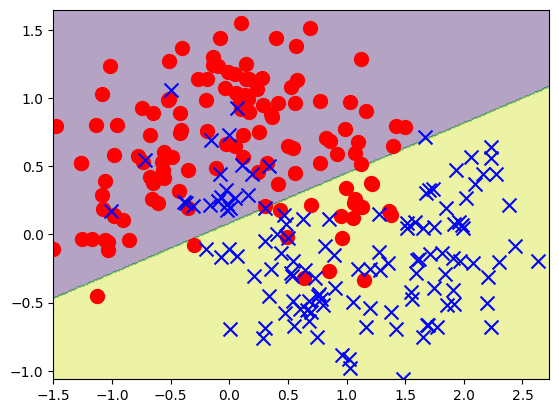

In [49]:
from sklearn.linear_model import LogisticRegression
times = time.time()
logistic = LogisticRegression().fit(X, y)
xx, yy = np.meshgrid(
    np.arange(X.min()[0], X.max()[0]+0.1, 0.01),
    np.arange(X.min()[1], X.max()[1]+0.1, 0.01))
XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))

Z = logistic.predict(XX).reshape(xx.shape)
print("Время: ", time.time() - times)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], marker="x", c='b', s=100)

In [16]:
logistic.score(X, y)

0.832

Время:  0.05742001533508301


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


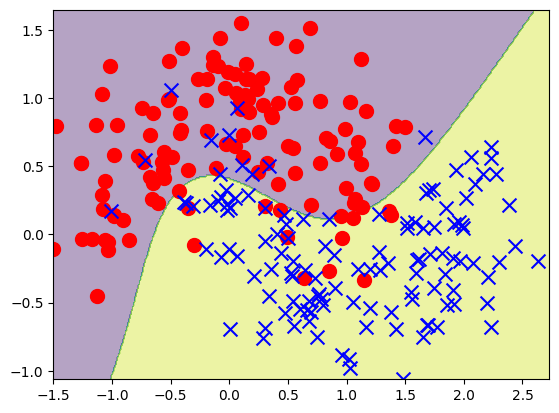

In [50]:
times = time.time()
class_transform = PolynomialFeatures(degree=3, include_bias=False)
X_3 = class_transform.fit_transform(X)
class_3 = LogisticRegression().fit(X_3, y)
Z = class_3.predict(class_transform.transform(XX)).reshape(xx.shape)
print("Время: ", time.time() - times)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], marker="x", c='b', s=100)

In [51]:
class_3.score(X_3, y)

0.9

In [55]:
times = time.time()
data_kc_prices = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/kc_house_data.csv")
data_kc_prices.shape
y_kc_prices = data_kc_prices.price
X_kc_prices = data_kc_prices.drop(["id", "date", "price"], axis=1)

In [56]:
y_kc_prices = data_kc_prices.price
X_kc_prices = data_kc_prices.drop(["id", "date", "price"], axis=1)

reg_kc_multiple = LinearRegression().fit(X_kc_prices, y_kc_prices)
reg_kc_multiple.score(X_kc_prices, y_kc_prices)

0.699747189010915

Время:  1.9317514896392822


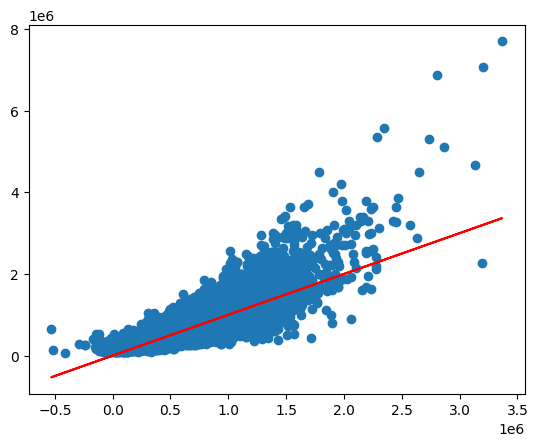

In [57]:
y_pred_kc_prices = reg_kc_multiple.predict(X_kc_prices)
print("Время: ", time.time() - times)
plt.scatter(y_pred_kc_prices, y_kc_prices)
plt.plot(y_pred_kc_prices, y_pred_kc_prices, c='r')

In [61]:
times = time.time()
X_3_kc_prices = (poly_features_kc_prices := PolynomialFeatures(degree=3)).fit_transform(X_kc_prices)

In [62]:
reg_poly2_kc = LinearRegression().fit(X_3_kc_prices, y_kc_prices)
reg_poly2_kc.score(X_3_kc_prices, y_kc_prices)

0.8650781867438108

Время:  7.72058367729187


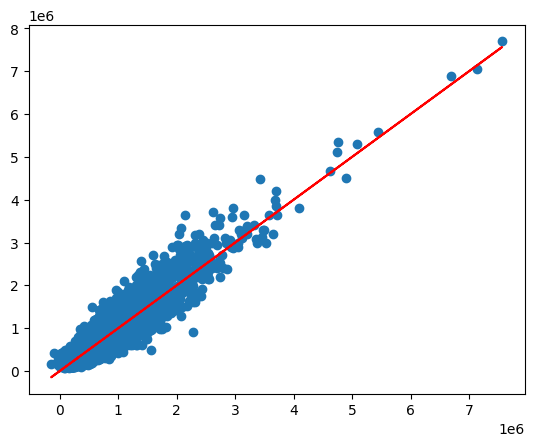

In [63]:
y_pred_kc_prices = reg_poly2_kc.predict(X_3_kc_prices)
print("Время: ", time.time() - times)
plt.scatter(y_pred_kc_prices, y_kc_prices)
plt.plot(y_pred_kc_prices, y_pred_kc_prices, c='r')

2. На датасете "gen_regression" постройте модель пятого, десятого и сотого порядков. Сравните эффективность и время обучения каждой модели.

In [7]:
from sklearn.linear_model import LinearRegression

In [3]:
models = []
degrees =[]
time_s = []
scores =[]

In [8]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/gen_regression.csv")

X = data.x
y = data.y

X = pd.DataFrame(X)

In [9]:
linear = LinearRegression().fit(X, y)

Время:  0.037943124771118164
Score:  0.9217478060447024


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


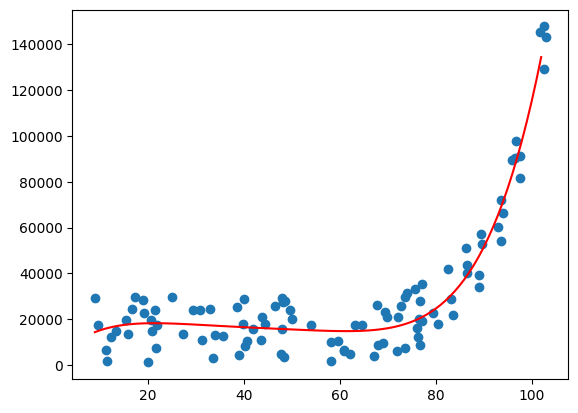

In [10]:
from sklearn.preprocessing import PolynomialFeatures
times = time.time()
transformation = PolynomialFeatures(degree=5)
transformation.fit(X)
X_2 = transformation.transform(X)
poly_2d = LinearRegression().fit(X_2, y)
xx = np.arange(X.x.min(axis=0), X.x.max(axis=0))
yy = linear.predict(pd.DataFrame(xx))
xx_2d = transformation.transform(pd.DataFrame(xx))
yy_2d = poly_2d.predict(xx_2d)
models.append("gen_redression")
degrees.append(5)
scores.append(poly_2d.score(X_2, y))
time_s.append(time.time() - times)
print("Время: ", time.time() - times)
print("Score: ", poly_2d.score(X_2, y))
plt.scatter(X.x, y)
plt.plot(xx, yy_2d, c='r')

Время:  0.024871349334716797
Score:  0.9232002062571606


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


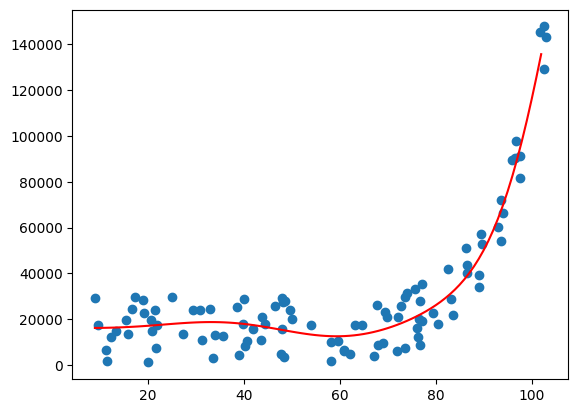

In [11]:
from sklearn.preprocessing import PolynomialFeatures
times = time.time()
transformation = PolynomialFeatures(degree=10)
transformation.fit(X)
X_2 = transformation.transform(X)
poly_2d = LinearRegression().fit(X_2, y)
xx = np.arange(X.x.min(axis=0), X.x.max(axis=0))
yy = linear.predict(pd.DataFrame(xx))
xx_2d = transformation.transform(pd.DataFrame(xx))
yy_2d = poly_2d.predict(xx_2d)
models.append("gen_redression")
degrees.append(10)
scores.append(poly_2d.score(X_2, y))
time_s.append(time.time() - times)
print("Время: ", time.time() - times)
print("Score: ", poly_2d.score(X_2, y))
plt.scatter(X.x, y)
plt.plot(xx, yy_2d, c='r')

Время:  0.02726435661315918
Score:  0.7924620004439387


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


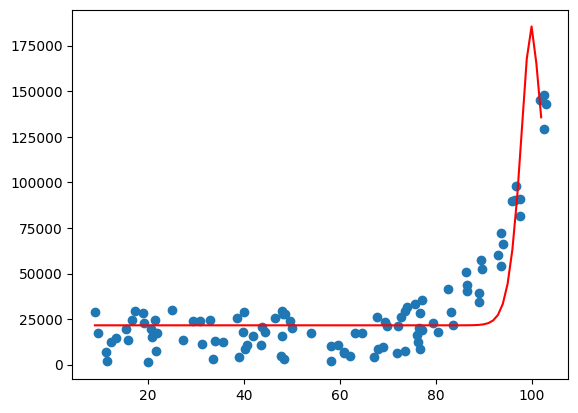

In [12]:
from sklearn.preprocessing import PolynomialFeatures
times = time.time()
transformation = PolynomialFeatures(degree=100)
transformation.fit(X)
X_2 = transformation.transform(X)
poly_2d = LinearRegression().fit(X_2, y)
xx = np.arange(X.x.min(axis=0), X.x.max(axis=0))
yy = linear.predict(pd.DataFrame(xx))
xx_2d = transformation.transform(pd.DataFrame(xx))
yy_2d = poly_2d.predict(xx_2d)
models.append("gen_redression")
degrees.append(100)
scores.append(poly_2d.score(X_2, y))
time_s.append(time.time() - times)
print("Время: ", time.time() - times)
print("Score: ", poly_2d.score(X_2, y))
plt.scatter(X.x, y)
plt.plot(xx, yy_2d, c='r')

Обучение модели при степени 10 даёт более высокую точность. При степени 100 модель переобучается. Однако чем выше степень полинома, тем больше времени тратится на обучение

3. То же самое проделайте с датасетом для классификации и "King county".

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression

In [14]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/gen_classification.csv", index_col=0)

data_kc_prices = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/kc_house_data.csv")

In [15]:
# данные gen_classification
y = data.y
X = data.drop(["y"], axis=1)

In [16]:
logistic = LogisticRegression().fit(X, y)

Время:  0.12077069282531738
Score:  0.916


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


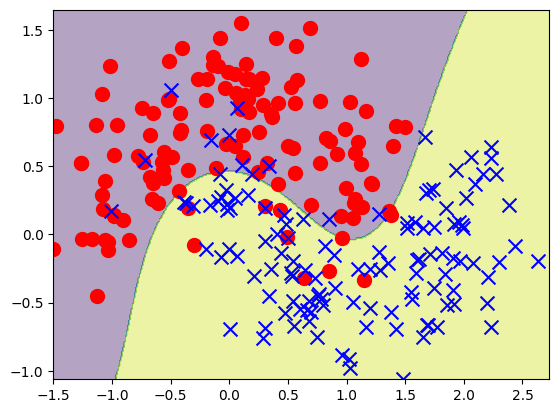

In [17]:
times = time.time()
class_transform = PolynomialFeatures(degree=5)
X_transf = class_transform.fit_transform(X)
times = time.time()
model = LogisticRegression().fit(X_transf, y)

xx, yy = np.meshgrid(
    np.arange(X.min()[0], X.max()[0]+0.1, 0.01),
    np.arange(X.min()[1], X.max()[1]+0.1, 0.01))
XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))
Z = model.predict(class_transform.transform(XX)).reshape(xx.shape)

models.append("gen_classification")
degrees.append(5)
scores.append(model.score(X_transf, y))
time_s.append(time.time() - times)

print("Время: ", time.time() - times)
print("Score: ", model.score(X_transf, y))

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], marker="x", c='b', s=100)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


Время:  0.4048306941986084
Score:  0.924


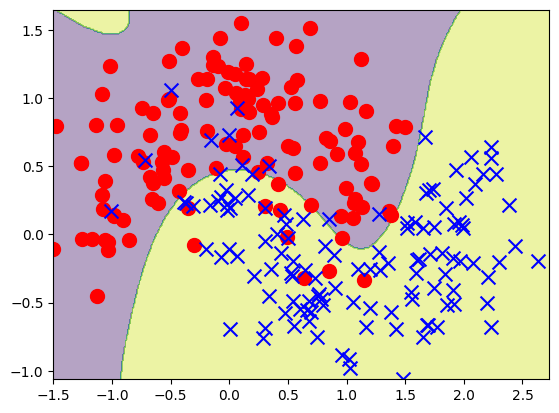

In [18]:
times = time.time()
class_transform = PolynomialFeatures(degree=10)
X_transf = class_transform.fit_transform(X)
times = time.time()
model = LogisticRegression().fit(X_transf, y)

xx, yy = np.meshgrid(
    np.arange(X.min()[0], X.max()[0]+0.1, 0.01),
    np.arange(X.min()[1], X.max()[1]+0.1, 0.01))
XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))
Z = model.predict(class_transform.transform(XX)).reshape(xx.shape)

models.append("gen_classification")
degrees.append(10)
scores.append(model.score(X_transf, y))
time_s.append(time.time() - times)

print("Время: ", time.time() - times)
print("Score: ", model.score(X_transf, y))

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], marker="x", c='b', s=100)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


Время:  6.254043102264404
Score:  0.5


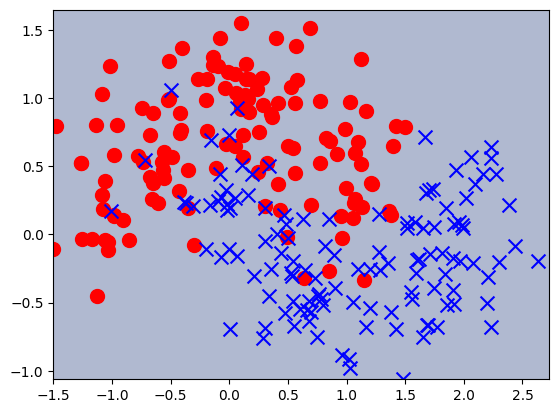

In [20]:
times = time.time()
class_transform = PolynomialFeatures(degree=100)
X_transf = class_transform.fit_transform(X)
times = time.time()
model = LogisticRegression().fit(X_transf, y)

xx, yy = np.meshgrid(
    np.arange(X.min()[0], X.max()[0]+0.1, 0.01),
    np.arange(X.min()[1], X.max()[1]+0.1, 0.01))
XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))
Z = model.predict(class_transform.transform(XX)).reshape(xx.shape)

models.append("gen_classification")
degrees.append(100)
scores.append(model.score(X_transf, y))
time_s.append(time.time() - times)

print("Время: ", time.time() - times)
print("Score: ", model.score(X_transf, y))

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], marker="x", c='b', s=100)

In [7]:
data_kc_prices.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [21]:
# данные King City
y = data_kc_prices.price[:500]
X = data_kc_prices.drop(["id", "date", "price", "yr_renovated", "zipcode","condition", "grade","floors", "long","view", "bedrooms", "bathrooms", "waterfront"], axis=1)[:500]

In [22]:
X.head()

,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,lat,sqft_living15,sqft_lot15
0,1180,5650,1180,0,1955,47.5112,1340,5650
1,2570,7242,2170,400,1951,47.7210,1690,7639
2,770,10000,770,0,1933,47.7379,2720,8062
3,1960,5000,1050,910,1965,47.5208,1360,5000
4,1680,8080,1680,0,1987,47.6168,1800,7503


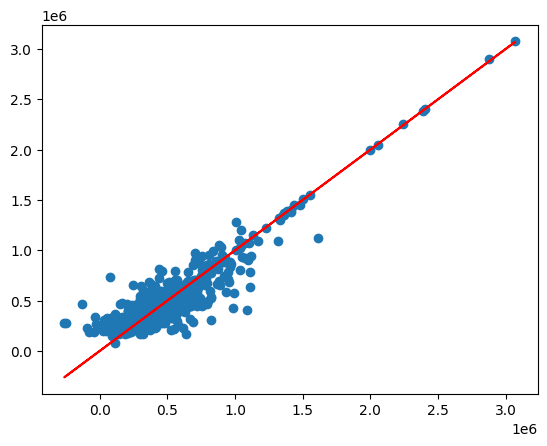

In [23]:
times = time.time()
X_3_kc_prices = (poly_features_kc_prices := PolynomialFeatures(degree=5)).fit_transform(X)
reg_poly2_kc = LinearRegression().fit(X_3_kc_prices, y)
reg_poly2_kc.score(X_3_kc_prices, y)
y_pred_kc_prices = reg_poly2_kc.predict(X_3_kc_prices)

models.append("King City")
degrees.append(5)
scores.append(reg_poly2_kc.score(X_3_kc_prices, y))
time_s.append(time.time() - times)

plt.scatter(y_pred_kc_prices, y)
plt.plot(y_pred_kc_prices, y_pred_kc_prices, c='r')

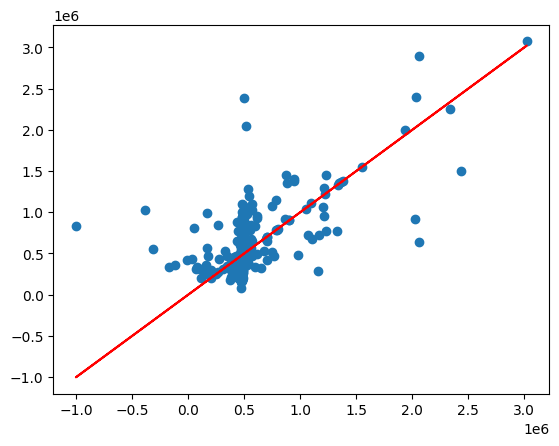

In [24]:
X_3_kc_prices = (poly_features_kc_prices := PolynomialFeatures(degree=10)).fit_transform(X)
reg_poly2_kc = LinearRegression().fit(X_3_kc_prices, y)
reg_poly2_kc.score(X_3_kc_prices, y)
y_pred_kc_prices = reg_poly2_kc.predict(X_3_kc_prices)

models.append("King City")
degrees.append(10)
scores.append(reg_poly2_kc.score(X_3_kc_prices, y))
time_s.append(time.time() - times)

plt.scatter(y_pred_kc_prices, y)
plt.plot(y_pred_kc_prices, y_pred_kc_prices, c='r')

4. Составьте таблицу эффективности разных моделей для каждой задачи. В таблице должна быть информация о времени обучения модели и получившейся точности. Сделайте вывод о целесообразности применения разных степеней полиномов.

In [25]:
pd.DataFrame({"Model": models, "degree":degrees, "score":scores, "time":times})

,Model,degree,score,time
0,gen_redression,5,0.921748,1.702850e+09
1,gen_redression,10,0.923200,1.702850e+09
2,gen_redression,100,0.792462,1.702850e+09
3,gen_classification,5,0.916000,1.702850e+09
4,gen_classification,10,0.924000,1.702850e+09
5,gen_classification,100,0.500000,1.702850e+09
6,King City,5,0.806249,1.702850e+09
7,King City,10,0.336580,1.702850e+09


5. Для линейной модели в задаче о продаже домов выведите коэффициенты модели и названия соответствующих атрибутов. Сделайте вывод об относительной важности атрибутов.

In [27]:
data_kc_prices = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/kc_house_data.csv")

y_kc_prices = data_kc_prices.price
X_kc_prices = data_kc_prices.drop(["id", "date", "price"], axis=1)
reg_kc_multiple = LinearRegression().fit(X_kc_prices, y_kc_prices)

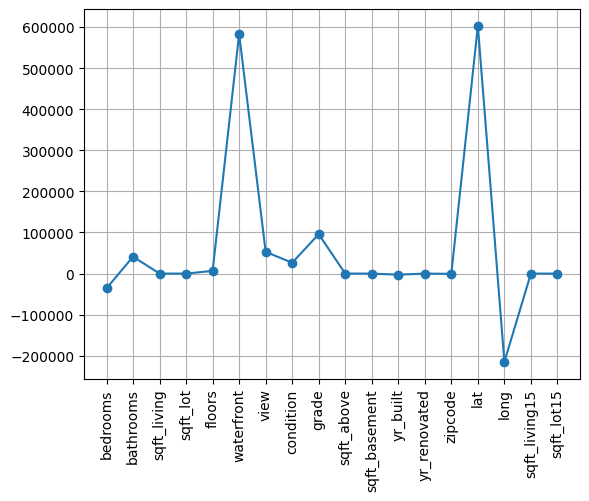

In [35]:
plt.plot(X_kc_prices.columns, reg_kc_multiple.coef_, marker='o')
plt.xticks(rotation = 90)
plt.grid(visible = True)
plt.show()

Самыми важными коэффициентами при выборе цены являются waterfront и lat

6. Попробуйте также проинтерпретировать полиномиальную модель.

In [40]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/gen_classification.csv", index_col=0)

y = data.y
X = data.drop(["y"], axis=1)
logistic = LogisticRegression().fit(X, y)

In [51]:
class_transform = PolynomialFeatures(degree=5)
X_transf = class_transform.fit_transform(X)
xtr = pd.DataFrame(X_transf)
model = LogisticRegression().fit(X_transf, y)

xx, yy = np.meshgrid(
    np.arange(X.min()[0], X.max()[0]+0.1, 0.01),
    np.arange(X.min()[1], X.max()[1]+0.1, 0.01))
XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))
Z = model.predict(class_transform.transform(XX)).reshape(xx.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


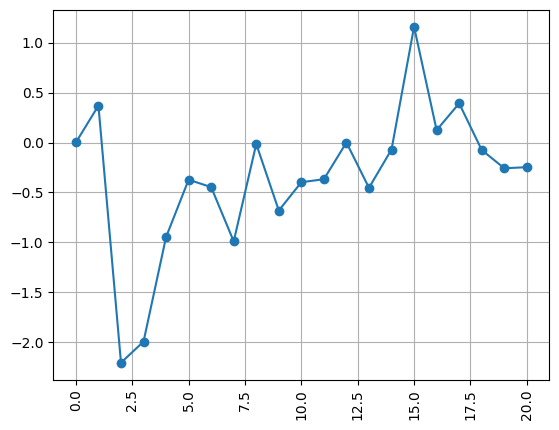

In [74]:
m = model.coef_
for i in range(m.shape[0]):
    plt.plot(xtr.columns, m[i], marker = "o")
    plt.xticks(rotation = 90)
plt.grid(visible = True)
plt.show()